In [8]:
model_path2 = (
    "../denoise_results/output_folder/net.pth"
)

In [11]:
import requests
from PIL import Image
from io import BytesIO

import torch

torch.cuda.empty_cache()
import torch.nn as nn
import os
from models import DnCNN


net = DnCNN(channels=1, num_of_layers=17)
device_ids = list(range(torch.cuda.device_count()))
# model = nn.DataParallel(net, device_ids=device_ids).cuda()
model.load_state_dict(torch.load(model_path2), strict=False)

RuntimeError: Error(s) in loading state_dict for DataParallel:
	size mismatch for module.dncnn.47.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 64, 3, 3]).

In [22]:
model.eval()

DataParallel(
  (module): DnCNN(
    (dncnn): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): ReLU(inplace=True)
      (5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): ReLU(inplace=True)
      (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (13):

In [23]:
from PIL import Image
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt
import numpy as np
def normalize(data):
    return data / 255.0

In [80]:
nlm_speck = r"D:\nora\nlp_hacker\kareem_genai\master_image_denoise\DnCNN-PyTorch\CNN_TASK\speck\_trad_methods_denoise\1_NLM_1.02_Blure.bmp"
wtf_speck = r"D:\nora\nlp_hacker\kareem_genai\master_image_denoise\DnCNN-PyTorch\CNN_TASK\speck\_trad_methods_denoise\1_WFT_4.08.bmp"
noise_free_speck = r"D:\nora\nlp_hacker\kareem_genai\master_image_denoise\DnCNN-PyTorch\CNN_TASK\speck\Noise_free1.bmp"
noise_speck = r"D:\nora\nlp_hacker\kareem_genai\master_image_denoise\DnCNN-PyTorch\CNN_TASK\speck\Noisy_1.bmp"

In [81]:
Img = cv2.imread(noise_free_speck)
Img = normalize(np.float32(Img[:, :, 0]))
Img = np.expand_dims(Img, 0)
Img = np.expand_dims(Img, 1)
ISource = torch.Tensor(Img)


Noise = cv2.imread(noise_speck)
Noise = normalize(np.float32(Noise[:, :, 0]))
Noise = np.expand_dims(Noise, 0)
Noise = np.expand_dims(Noise, 1)
INoise = torch.Tensor(Noise)

In [82]:
from skimage.metrics import peak_signal_noise_ratio
import numpy as np


In [83]:
ISource= ISource.cuda()
INoise = INoise.cuda()

In [84]:
def batch_PSNR(img, imclean, data_range):
    Img = img.data.cpu().numpy().astype(np.float32)
    Iclean = imclean.data.cpu().numpy().astype(np.float32)
    PSNR = 0
    for i in range(Img.shape[0]):
        PSNR += peak_signal_noise_ratio(
            Iclean[i, :, :, :], Img[i, :, :, :], data_range=data_range
        )
    return PSNR / Img.shape[0]

In [85]:
with torch.no_grad():
    Out = torch.clamp(INoise-model(INoise),0.,1.)
psnr = batch_PSNR(Out,ISource,1.0)
psnr

np.float64(26.952141699178142)

In [94]:
batch_PSNR(tensor_image.unsqueeze(0),ISource,1.0)

np.float64(26.71361553284376)

In [87]:
batch_PSNR(INoise,ISource,1.0)

np.float64(17.801380023247983)

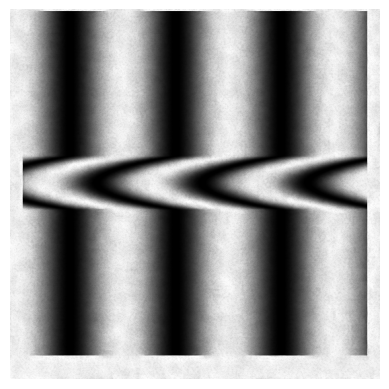

In [88]:
plt.imshow(
    Out.squeeze(0).detach().permute(1,2,0).cpu(),
    # test_pil,
    # noise_free_speck.detach().permute(1,2,0).cpu(),
    # wtf_speck.detach().permute(1, 2, 0).cpu(),
    cmap="gray",
)  # Use 'gray' for grayscale images
plt.axis("off")  # Turn off axis labels if desired
plt.show()

In [89]:
from torchvision.transforms import ToPILImage
from torchvision.transforms import ToTensor
from PIL import Image

In [90]:
save_img = Out.squeeze(0)
pil_image = ToPILImage()(save_img)
pil_image.save("denoized_speck.png")

In [91]:
pil_image = Image.open("./denoized_speck.png").convert(
    "L"
)


In [92]:
tensor_image = ToTensor()(pil_image)

In [93]:
tensor_image.size()

torch.Size([1, 550, 550])